# 一、研究问题及意义

# 数据集是来自于和鲸社区，数据集是关于客户购买产品，研究问题是基于客户购买产品的个人信息以及消息记录进行回归预测，目标变量是客户是否购买该产品，研究意义是根据用户的历史行为数据，推测出该用户会不会购买银行的销售产品

# 二、数据来源

数据来源的网站：https://www.kesci.com/mw/project/5f901245e200680030f124bb/dataset

# 三、数据的简单描述以及数据预处理

In [55]:
#各种包的引入
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import*
import math
import random
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from openpyxl.drawing.line import LineProperties
from openpyxl.chart.shapes import GraphicalProperties
from openpyxl.chart.axis import ChartLines
from openpyxl.chart.label import DataLabelList
import scipy.stats as stats
from sklearn import tree 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import classification_report 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from numpy.linalg import inv  # 矩阵求逆
from numpy import dot  # 矩阵点乘
from numpy import mat 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model   
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error # 均方误差
from sklearn.metrics import mean_absolute_error # 平方绝对误差
from scipy.stats import pearsonr
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

In [2]:
#读取训练集和测试集
train=pd.read_csv('train_set.csv')
test=pd.read_csv('test_set.csv')
print('训练数据集：',train.shape,'测试数据集：',test.shape)

训练数据集： (25317, 18) 测试数据集： (10852, 17)


In [3]:
#用info语句检查train数据集中各项的数据类型以及是否存在null值，由下面内容可以看出这个数据集没有null。8个数值型，9个object类型。
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25317 entries, 0 to 25316
Data columns (total 18 columns):
ID           25317 non-null int64
age          25317 non-null int64
job          25317 non-null object
marital      25317 non-null object
education    25317 non-null object
default      25317 non-null object
balance      25317 non-null int64
housing      25317 non-null object
loan         25317 non-null object
contact      25317 non-null object
day          25317 non-null int64
month        25317 non-null object
duration     25317 non-null int64
campaign     25317 non-null int64
pdays        25317 non-null int64
previous     25317 non-null int64
poutcome     25317 non-null object
y            25317 non-null int64
dtypes: int64(9), object(9)
memory usage: 3.5+ MB


In [4]:
#用info语句检查train数据集中各项的数据类型以及是否存在null值，由下面内容可以看出这个数据集没有null。8个数值型，9个object类型。
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10852 entries, 0 to 10851
Data columns (total 17 columns):
ID           10852 non-null int64
age          10852 non-null int64
job          10852 non-null object
marital      10852 non-null object
education    10852 non-null object
default      10852 non-null object
balance      10852 non-null int64
housing      10852 non-null object
loan         10852 non-null object
contact      10852 non-null object
day          10852 non-null int64
month        10852 non-null object
duration     10852 non-null int64
campaign     10852 non-null int64
pdays        10852 non-null int64
previous     10852 non-null int64
poutcome     10852 non-null object
dtypes: int64(8), object(9)
memory usage: 1.4+ MB


In [5]:
#用describe语句来检查数值型数据
train.describe()
#1.是否有缺失项，目前这个数据集是没有缺失的。所以不用处理缺失值；
#2.测试数据集只有11.7%转化率；
#3.年龄平均值是41岁；
#4.账户余额最少的那位是-8019；
#5.pdays=999的时候没有意义，要特殊处理；

,ID,age,balance,day,duration,campaign,pdays,previous,y
count,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000,25317.000000
mean,12659.000000,40.935379,1357.555082,15.835289,257.732393,2.772050,40.248766,0.591737,0.116957
std,7308.532719,10.634289,2999.822811,8.319480,256.975151,3.136097,100.213541,2.568313,0.321375
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6330.000000,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,12659.000000,39.000000,448.000000,16.000000,181.000000,2.000000,-1.000000,0.000000,0.000000
75%,18988.000000,48.000000,1435.000000,21.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,25317.000000,95.000000,102127.000000,31.000000,3881.000000,55.000000,854.000000,275.000000,1.000000


In [6]:
category = pd.Series({"定类型数据特征:":"job,marital,contact,poutcome", "定序数据特征:":"education,day,month", "定距数据特征:":"没有", "定比数据特征:":"age,balance,duration,campain,pdays,previous","布尔值数据特征:":"default,housing,loan"})
print(pd.DataFrame(category))

                                                    0
定类型数据特征:                 job,marital,contact,poutcome
定序数据特征:                           education,day,month
定距数据特征:                                            没有
定比数据特征:   age,balance,duration,campain,pdays,previous
布尔值数据特征:                         default,housing,loan


# 由以上操作可知，该数据集中没有缺失项，因此不需要做缺失值处理

In [7]:
#接下来处理定序特征，通过get_dummies函数变成one-hot独热编码
A= train['day'].astype("M8[D]")
print(A)

0       1970-01-10
1       1970-01-08
2       1970-01-15
3       1970-01-19
4       1970-01-22
           ...    
25312   1970-01-15
25313   1970-01-19
25314   1970-01-14
25315   1970-01-19
25316   1970-01-20
Name: day, Length: 25317, dtype: datetime64[ns]


In [8]:
train1= pd.get_dummies(train)
train1.columns

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [9]:
train1.head()

,ID,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,43,291,9,150,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2,42,5076,7,99,1,251,2,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,47,104,14,77,2,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,4,28,-994,18,174,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,42,2974,21,187,5,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [10]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25312,25313,55,blue-collar,divorced,primary,no,8180,no,no,cellular,14,may,854,2,360,1,failure,1
25313,25314,52,services,married,secondary,no,961,no,yes,cellular,18,feb,222,1,553,4,failure,1
25314,25315,35,blue-collar,divorced,primary,no,300,yes,no,unknown,13,may,945,2,-1,0,unknown,1
25315,25316,37,entrepreneur,divorced,tertiary,no,66,no,no,cellular,18,nov,1164,2,-1,0,unknown,1


# 变量分布的描述

In [11]:
#生成定性变量的频数分布表或图，分析一下各变量的分布情况
#以下是各定性变量用字典的形式将其各个类别名称和频数分布表述出来
count1 = pd.value_counts(train['job'])
count2 = pd.value_counts(train['marital'])
count3 = pd.value_counts(train['education'])
count4 = pd.value_counts(train['contact'])
count5 = pd.value_counts(train['poutcome'])
count6 = pd.value_counts(train['day'])
count7 = pd.value_counts(train['month'])
print(dict(count1))
print(dict(count2))
print(dict(count3))
print(dict(count4))
print(dict(count5))
print(dict(count6))
print(dict(count7))

{'blue-collar': 5456, 'management': 5296, 'technician': 4241, 'admin.': 2909, 'services': 2342, 'retired': 1273, 'self-employed': 884, 'entrepreneur': 856, 'unemployed': 701, 'housemaid': 663, 'student': 533, 'unknown': 163}
{'married': 15245, 'single': 7157, 'divorced': 2915}
{'secondary': 12957, 'tertiary': 7447, 'primary': 3848, 'unknown': 1065}
{'cellular': 16391, 'unknown': 7281, 'telephone': 1645}
{'unknown': 20677, 'failure': 2735, 'other': 1070, 'success': 835}
{20: 1552, 18: 1331, 21: 1121, 17: 1086, 5: 1081, 6: 1056, 28: 1037, 7: 1034, 8: 1031, 14: 1023, 19: 1001, 15: 952, 29: 945, 12: 888, 9: 880, 30: 874, 13: 856, 16: 816, 11: 815, 4: 792, 2: 717, 27: 658, 3: 605, 26: 576, 23: 541, 22: 484, 25: 466, 31: 374, 10: 287, 24: 255, 1: 183}
{'may': 7655, 'jul': 3937, 'aug': 3482, 'jun': 2968, 'nov': 2243, 'apr': 1669, 'feb': 1464, 'jan': 777, 'oct': 411, 'sep': 339, 'mar': 269, 'dec': 103}


Text(0.5, 1.0, 'contact')

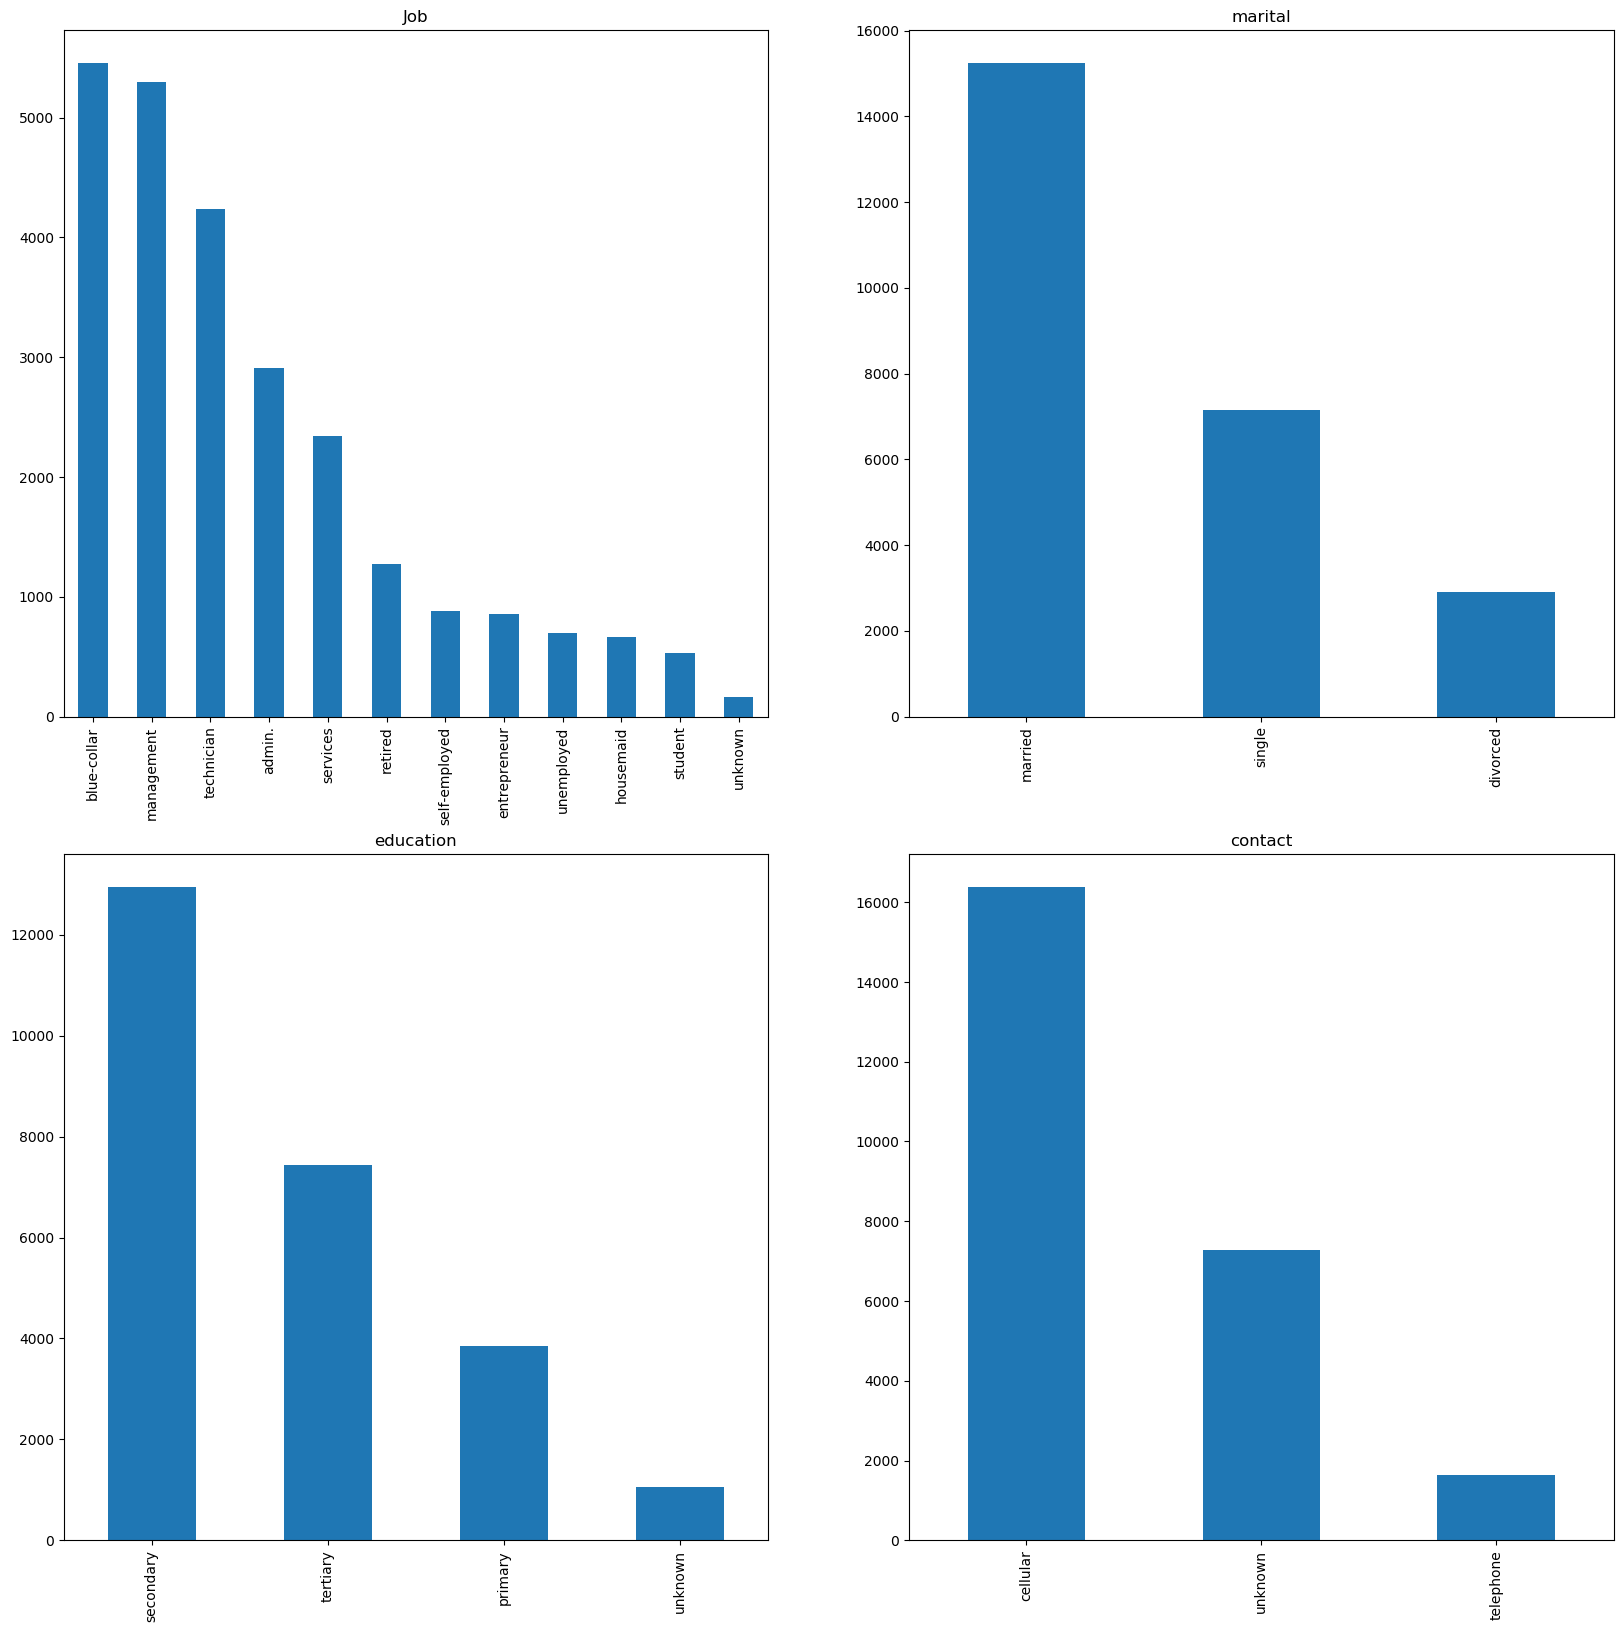

In [12]:
#绘制关于定性变量的频数分布的柱状图
plt.figure(dpi=100,figsize=(20,20))
plt.subplot(2,2,1)
train['job'].value_counts().plot(kind='bar')
plt.title("Job")
plt.subplot(2,2,2)
train['marital'].value_counts().plot(kind='bar')
plt.title("marital")
plt.subplot(2,2,3)
train['education'].value_counts().plot(kind='bar')
plt.title("education")
plt.subplot(2,2,4)
train['contact'].value_counts().plot(kind='bar')
plt.title("contact")

Text(0.5, 1.0, 'default')

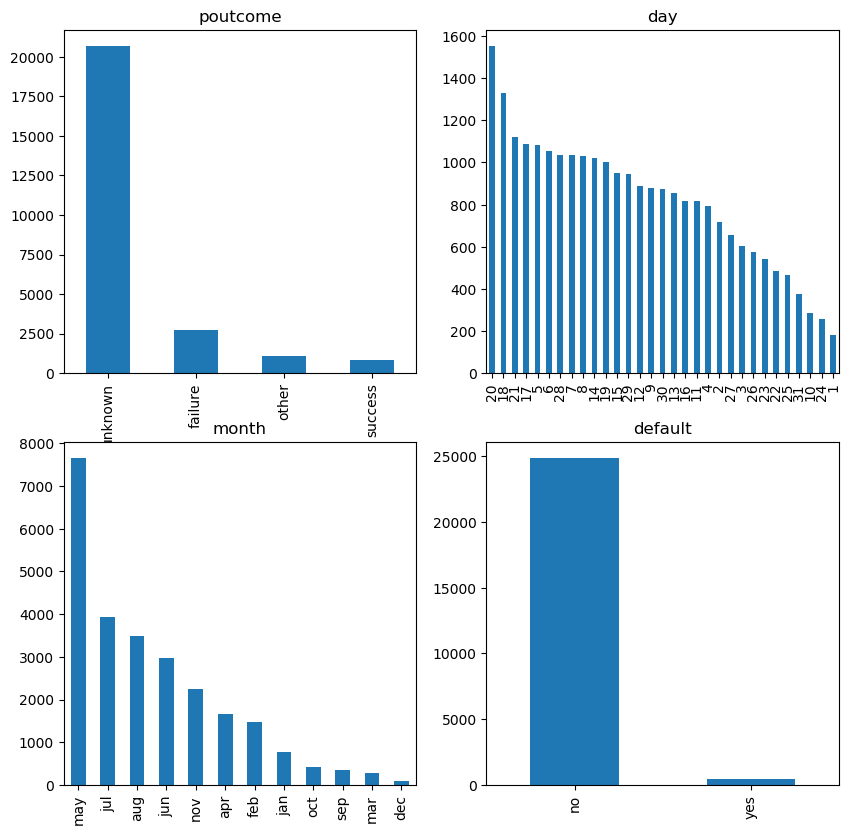

In [13]:
#绘制关于定性变量的频数分布的柱状图(续)
plt.figure(dpi=100,figsize=(10,10))
plt.subplot(2,2,1)
train['poutcome'].value_counts().plot(kind='bar')
plt.title("poutcome")
plt.subplot(2,2,2)
train['day'].value_counts().plot(kind='bar')
plt.title("day")
plt.subplot(2,2,3)
train['month'].value_counts().plot(kind='bar')
plt.title("month")
plt.subplot(2,2,4)
train['default'].value_counts().plot(kind='bar')
plt.title("default")

In [14]:
#计算各定性变量的信息熵
job=train['job'].value_counts(normalize=True).round(4)
logjob=job.apply(lambda x: math.log(x)).round(4)
producejob=(job*logjob).round(4)
entropyjob=-(sum(producejob))
print("定性变量中Job的熵值大小为：",entropyjob)   
marital=train['marital'].value_counts(normalize=True).round(4)
logmarital=marital.apply(lambda x: math.log(x)).round(4)
producemarital=(marital*logmarital).round(4)
entropymarital=-(sum(producemarital))
print("定性变量中marital的熵值大小为：",entropymarital)   
education=train['education'].value_counts(normalize=True).round(4)
logeducation=education.apply(lambda x: math.log(x)).round(4)
produceeducation=(education*logeducation).round(4)
entropyeducation=-(sum(produceeducation))
print("定性变量中education的熵值大小为：",entropyeducation)   
contact=train['contact'].value_counts(normalize=True).round(4)
logcontact=contact.apply(lambda x: math.log(x)).round(4)
producecontact=(contact*logcontact).round(4)
entropycontact=-(sum(producecontact))
print("定性变量中contact的熵值大小为：",entropycontact)   
poutcome=train['poutcome'].value_counts(normalize=True).round(4)
logpoutcome=poutcome.apply(lambda x: math.log(x)).round(4)
producepoutcome=(poutcome*logpoutcome).round(4)
entropypoutcome=-(sum(producepoutcome))
print("定性变量中poutcome的熵值大小为：",entropypoutcome)   
day=train['day'].value_counts(normalize=True).round(4)
logday=day.apply(lambda x: math.log(x)).round(4)
produceday=(day*logday).round(4)
entropyday=-(sum(produceday))
print("定性变量中day的熵值大小为：",entropyday)   
month=train['month'].value_counts(normalize=True).round(4)
logmonth=month.apply(lambda x: math.log(x)).round(4)
producemonth=(month*logmonth).round(4)
entropymonth=-(sum(producemonth))
print("定性变量中month的熵值大小为：",entropymonth)  
default=train['default'].value_counts(normalize=True).round(4)
logdefault=default.apply(lambda x: math.log(x)).round(4)
producedefault=(default*logdefault).round(4)
entropydefault=-(sum(producedefault))
print("定性变量中default的熵值大小为：",entropydefault)  

定性变量中Job的熵值大小为： 2.1165000000000003
定性变量中marital的熵值大小为： 0.9114000000000001
定性变量中education的熵值大小为： 1.1226
定性变量中contact的熵值大小为： 0.8175999999999999
定性变量中poutcome的熵值大小为： 0.6522
定性变量中day的熵值大小为： 3.3538999999999994
定性变量中month的熵值大小为： 2.0361
定性变量中default的熵值大小为： 0.08900000000000001


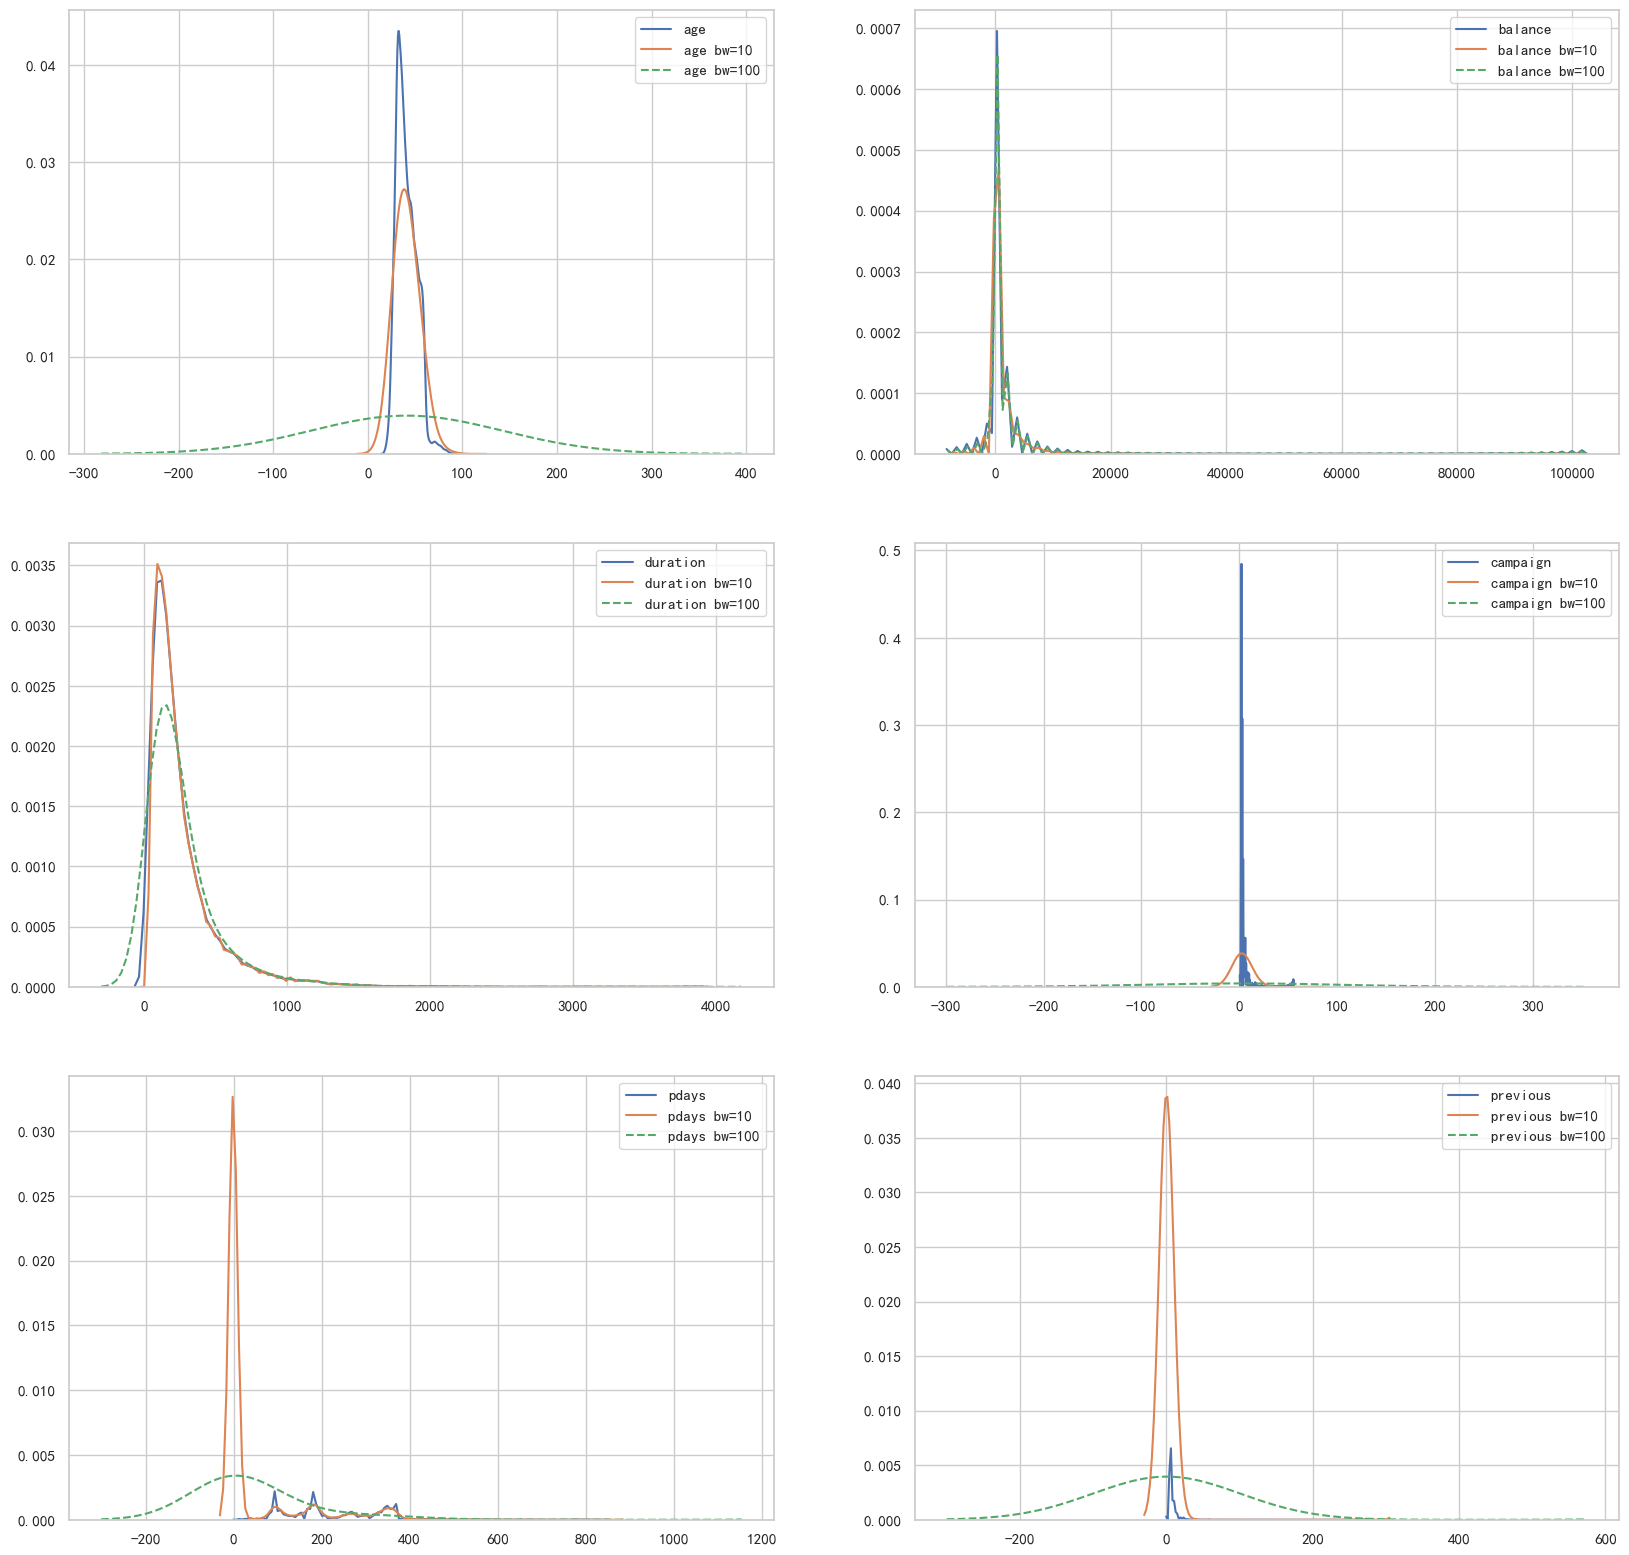

In [15]:
#生成定量变量的频数分布图
plt.rcParams['font.family'] = ['sans-serif'] #正确显示中文 
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
sns.set(context='notebook',font='simhei',style='whitegrid')
plt.figure(figsize=(20,20),dpi=100)
plt.subplot(3,2,1)
sns.kdeplot(train['age'])
sns.kdeplot(train['age'],bw=10,linewidth = 1.5,label='age bw=10')
sns.kdeplot(train['age'],bw=100,linestyle='--',linewidth = 1.5,label='age bw=100')
plt.subplot(3,2,2)
sns.kdeplot(train['balance'])
sns.kdeplot(train['balance'],bw=10,linewidth = 1.5,label='balance bw=10')
sns.kdeplot(train['balance'],bw=100,linestyle='--',linewidth = 1.5,label='balance bw=100')
plt.subplot(3,2,3)
sns.kdeplot(train['duration'])
sns.kdeplot(train['duration'],bw=10,linewidth = 1.5,label='duration bw=10')
sns.kdeplot(train['duration'],bw=100,linestyle='--',linewidth = 1.5,label='duration bw=100')
plt.subplot(3,2,4)
sns.kdeplot(train['campaign'])
sns.kdeplot(train['campaign'],bw=10,linewidth = 1.5,label='campaign bw=10')
sns.kdeplot(train['campaign'],bw=100,linestyle='--',linewidth = 1.5,label='campaign bw=100')
plt.subplot(3,2,5)
sns.kdeplot(train['pdays'])
sns.kdeplot(train['pdays'],bw=10,linewidth = 1.5,label='pdays bw=10')
sns.kdeplot(train['pdays'],bw=100,linestyle='--',linewidth = 1.5,label='pdays bw=100')
plt.subplot(3,2,6)
sns.kdeplot(train['previous'])
sns.kdeplot(train['previous'],bw=10,linewidth = 1.5,label='previous bw=10')
sns.kdeplot(train['previous'],bw=100,linestyle='--',linewidth = 1.5,label='previous bw=100')
plt.show()

由定量变量的频数分布图，可以看出，对于数据集中的age,campaign,balance以及previous来说，其分布比较合适，接近于正态分布；对于数据集中的pdays和duration数据来说，其数据表示的含义是持续时间以及支付日期时间，因此其分布相对而言也比较合理，不必再进行定量变换的转换。

In [16]:
#计算定量变量的标准差系数，也就是计算标准差除以均值，先计算各定量变量的标准差，再计算各定量变量的均值
a0=train['age'].mean()
b0=train['age'].std()
print("age的标准差系数:",b0/a0)  #求出age的标准差系数
print("age的标准差:",b0)        #求出age的标准差
print("age的均值:",a0)          #求出age的均值
print("age的偏度:",train['age'].skew())              #求出age的偏度
print("age的峰度:",train['age'].kurt())              #求出age的峰度
print("-------------------")
a1=train['balance'].mean()
b1=train['balance'].std()
print("balance的标准差系数:",b1/a1)    #求出balance的标准差系数
print("balance的标准差:",b1)           #求出balance的标准差
print("balance的均值:",a1)             #求出balance的均值
print("balance的偏度:",train['balance'].skew())              #求出balance的偏度
print("balance的峰度:",train['balance'].kurt())              #求出balance的峰度
print("-------------------")
a2=train['duration'].mean()  
b2=train['duration'].std()
print("duration的标准差系数:",b2/a2)    #求出duration的标准差系数
print("duration的标准差:",b2)           #求出duration的标准差
print("duration的均值:",a2)             #求出duration的均值
print("duration的偏度:",train['duration'].skew())              #求出duration的偏度
print("duration的峰度:",train['duration'].kurt())              #求出duration的峰度
print("-------------------")
a3=train['campaign'].mean()
b3=train['campaign'].std()
print("campaign的标准差系数:",b3/a3)    #求出campaign的标准差系数
print("campaign的标准差:",b3)           #求出campaign的标准差
print("campaign的均值:",a3)             #求出campaign的均值
print("campaign的偏度:",train['campaign'].skew())              #求出campaign的偏度
print("campaign的峰度:",train['campaign'].kurt())              #求出campaign的峰度
print("-------------------")
a4=train['pdays'].mean()
b4=train['pdays'].std()
print("pdays的标准差系数:",b4/a4)    #求出pdays的标准差系数
print("pdays的标准差:",b4)           #求出pdays的标准差
print("pdays的均值:",a4)             #求出pdays的均值
print("pdays的偏度:",train['pdays'].skew())              #求出pdays的偏度
print("pdays的峰度:",train['pdays'].kurt())              #求出pdays的峰度
print("-------------------")
a5=train['previous'].mean()
b5=train['previous'].std()
print("previous的标准差系数:",b5/a5)    #求出previous的标准差系数
print("previous的标准差:",b5)           #求出previous的标准差
print("previous的均值:",a5)            #求出previous的均值
print("previous的偏度:",train['previous'].skew())              #求出previous的偏度
print("previous的峰度:",train['previous'].kurt())              #求出previous的峰度

age的标准差系数: 0.2597823430488986
age的标准差: 10.634288771359149
age的均值: 40.935379389343126
age的偏度: 0.697113094160746
age的峰度: 0.3621535976504693
-------------------
balance的标准差系数: 2.2097245643621624
balance的标准差: 2999.8228112105085
balance的均值: 1357.5550815657464
balance的偏度: 8.516385983971924
balance的峰度: 158.4390688473542
-------------------
duration的标准差系数: 0.9970619032369247
duration的标准差: 256.97515054318717
duration的均值: 257.73239325354507
duration的偏度: 3.151016008493643
duration的峰度: 17.804596570295384
-------------------
campaign的标准差系数: 1.1313275542236103
campaign的标准差: 3.136097000253307
campaign的均值: 2.77205040091638
campaign的偏度: 4.850206763821843
campaign的峰度: 37.010189861014716
-------------------
pdays的标准差系数: 2.489853782782301
pdays的标准差: 100.21354140980145
pdays的均值: 40.24876565153849
pdays的偏度: 2.6239486939873284
pdays的峰度: 6.989269454838938
-------------------
previous的标准差系数: 4.340296266418741
previous的标准差: 2.568312926777231
previous的均值: 0.5917367776592803
previous的偏度: 51.18159336510288
previou

# 标准差系数是将标准差与相应的平均数对比的结果，是反映标志变动度的绝对指标。它的大小，不仅取决于标准值的离差程度，还决定于数列平均水平的高低。标准差系数 越大，变量可能越重要。由此，从标准差系数上来看，previous>pdays>balance>campaign>duration>age

In [17]:
#对定量变量进行重组，组成一个新的dataframe进而转换成矩阵形式进行噪声处理
s = pd.DataFrame(train[['age','balance','duration','campaign','pdays','previous']])
S=s.as_matrix()

In [18]:
#噪声值处理函数：
# 获得矩阵的字段数量
def width(lst):
    i = 0;
    for j in lst[0]:
        i += 1
    return i
 
 # 得到每个字段的平均值
def GetAverage(mat):
    n = len(mat)
    m = width(mat)
    num = [0] * m
    for i in range(0, m):
        for j in mat:
            num[i] += j[i]
        num[i] = num[i] / n
    return num
 
 # 获得每个字段的标准差
def GetVar(average, mat):
    ListMat = []
    for i in mat:
        ListMat.append(list(map(lambda x: x[0] - x[1], zip(average, i))))
 
    n = len(ListMat)
    m = width(ListMat)
    num = [0] * m
    for j in range(0, m):
        for i in ListMat:
            num[j] += i[j] * i[j]
        num[j] /= n
    return num
 
# 获得每个字段的标准差
def GetStandardDeviation(mat):
    return list(map(lambda x:x**0.5,mat))
# 对数据集去噪声
def DenoisMat(mat):
    average = GetAverage(mat)
    variance = GetVar(average, mat)
    standardDeviation=GetStandardDeviation(variance)
    section = list(map(lambda x: x[0] + 3*x[1], zip(average, standardDeviation)))
    n = len(mat)
    m = width(mat)
    num = [0] * m
    denoisMat = []
    noDenoisMat=[]
    for i in mat:
        for j in range(0, m):
            if i[j] > section[j]:
                denoisMat.append(i)
                break
            if j==(m-1):
                noDenoisMat.append(i)
    print("去除完噪声的数据：")
    print(noDenoisMat)
    print("噪声数据：")
    return denoisMat
 
if __name__ == '__main__':
    print("初始数据：")
    print(S)
    print(DenoisMat(S))

初始数据：
[[  43  291  150    2   -1    0]
 [  42 5076   99    1  251    2]
 [  47  104   77    2   -1    0]
 ...
 [  35  300  945    2   -1    0]
 [  37   66 1164    2   -1    0]
 [  52   40 1265    3   -1    0]]
去除完噪声的数据：
[array([ 43, 291, 150,   2,  -1,   0], dtype=int64), array([  42, 5076,   99,    1,  251,    2], dtype=int64), array([ 47, 104,  77,   2,  -1,   0], dtype=int64), array([  28, -994,  174,    2,   -1,    0], dtype=int64), array([  42, 2974,  187,    5,   -1,    0], dtype=int64), array([ 56, 450,  47,   1,  -1,   0], dtype=int64), array([  32, 1716,  157,    4,   -1,    0], dtype=int64), array([  33, -359,   59,    2,   -1,    0], dtype=int64), array([ 32, 309,  99,   3,  -1,   0], dtype=int64), array([  55, 4777,   12,    3,   -1,    0], dtype=int64), array([  54, 1076,  338,    1,   -1,    0], dtype=int64), array([  59, 1035,  126,    2,  239,    1], dtype=int64), array([ 48, 473, 198,   2,  -1,   0], dtype=int64), array([ 54,   0, 159,   2,  -1,   0], dtype=int64), arr

In [19]:
data = pd.DataFrame(S)
data

,0,1,2,3,4,5
0,43,291,150,2,-1,0
1,42,5076,99,1,251,2
2,47,104,77,2,-1,0
3,28,-994,174,2,-1,0
4,42,2974,187,5,-1,0
...,...,...,...,...,...,...
25312,55,8180,854,2,360,1
25313,52,961,222,1,553,4
25314,35,300,945,2,-1,0
25315,37,66,1164,2,-1,0


# 由以上数据噪声处理的过程结合对比原来的数据可以看出，对于上述处理噪声数据的方法原数据中并未存在噪声数据，原数据共有25317行，处理后的数据仍与原来的保持一致，可以推断出该数据不存在符合噪声数据条件的数据

# 四、自变量重要性的初步分析

方法（1）：根据前面已有的数据分布描述，对定性变量按熵值由大到小进行排序，对定量变量按标准差系数由大到小进行排序

In [20]:
#对定量变量按标准差系数由大到小进行排序
obj1 = pd.Series([b0/a0,b1/a1,b2/a2,b3/a3,b4/a4,b5/a5],
index=['age的标准差系数','balance的标准差系数','duration的标准差系数','campaign的标准差系数','pdays的标准差系数',
      'previous的标准差系数'])
print("从大到小的标准差系数排序：")
obj1.sort_values(ascending=False)

从大到小的标准差系数排序：


previous的标准差系数    4.340296
pdays的标准差系数       2.489854
balance的标准差系数     2.209725
campaign的标准差系数    1.131328
duration的标准差系数    0.997062
age的标准差系数         0.259782
dtype: float64

In [21]:
#对定性变量按熵值由大到小进行排序
obj2 = pd.Series([entropyjob,entropymarital,entropyeducation,entropycontact,entropypoutcome,entropyday,entropymonth,entropydefault],
                 index=['job熵值大小','marital熵值大小','education熵值大小','contact熵值大小','poutcome熵值大小','day熵值大小','month熵值大小','default熵值大小'])
print("从大到小的熵值排序：")
obj2.sort_values(ascending=False)

从大到小的熵值排序：


day熵值大小          3.3539
job熵值大小          2.1165
month熵值大小        2.0361
education熵值大小    1.1226
marital熵值大小      0.9114
contact熵值大小      0.8176
poutcome熵值大小     0.6522
default熵值大小      0.0890
dtype: float64

方法（2）:根据自变量和因变量的类型，用卡方检验、方差分析、相关系数中的合适标准，分析自变量和因变量的关系，初步分析哪些变量对因变量有显著影响

In [22]:
#卡方检验
train1=train[['job','marital','education','contact','poutcome','day','month','default']]
ka={}
for i in train1.columns:
    b=pd.crosstab(train1[i],train['y'])#生成二维交叉列表
    Chi2,p, df, exp=chi2_contingency(b) #卡方检验，p 是假设检验的 p 值，df是自由度，exp 是在原假设独立条件下的各单元格的期望频数
    #print("Pearson Chi2:\n p-value={},df={}".format(p,df)) #填上运行结果
    #print("expected array:\n {}".format(exp)) #填上期望频数的运行结果
    print(i,'的P值是：',p)
    ka[i]=p
kat=pd.DataFrame(pd.Series(ka))
print('\n p 值远小于0.01的变量有：\n',kat[kat[0]<0.01])
print('大多数变量都与因变量相关\n')

job 的P值是： 1.6689326701812424e-94
marital 的P值是： 2.1747660254951498e-20
education 的P值是： 4.2702394030739887e-32
contact 的P值是： 1.6018730983220607e-130
poutcome 的P值是： 0.0
day 的P值是： 3.491047572700813e-53
month 的P值是： 0.0
default 的P值是： 0.0001223816347433688

 p 值远小于0.01的变量有：
                        0
job         1.668933e-94
marital     2.174766e-20
education   4.270239e-32
contact    1.601873e-130
poutcome    0.000000e+00
day         3.491048e-53
month       0.000000e+00
default     1.223816e-04
大多数变量都与因变量相关



In [23]:
dict_data2 = {
 '定性变量名称':["default","marital","education","day","job","contact","month","poutcome"],
 'P值大小':[1.223816e-04,2.174766e-20,4.270239e-32,3.491048e-53,1.668933e-94,1.601873e-130,0.000000e+00,0.000000e+00]}
pd.DataFrame(dict_data2)

,定性变量名称,P值大小
0,default,1.223816e-04
1,marital,2.174766e-20
2,education,4.270239e-32
3,day,3.491048e-53
4,job,1.668933e-94
5,contact,1.601873e-130
6,month,0.000000e+00
7,poutcome,0.000000e+00


In [24]:
#对卡方分布所得到的p值进行从大到小的排序，从而判断不同的定性变量对目标变量的影响程度大小
kaa = pd.Series(ka)
kaa.sort_values(ascending=False)
print(kaa.sort_values(ascending=False))
print("定性变量对目标变量的影响程度排序：default<marital<education<day<job<contact<month<poutcome")

default       1.223816e-04
marital       2.174766e-20
education     4.270239e-32
day           3.491048e-53
job           1.668933e-94
contact      1.601873e-130
month         0.000000e+00
poutcome      0.000000e+00
dtype: float64
定性变量对目标变量的影响程度排序：default<marital<education<day<job<contact<month<poutcome


In [25]:
#方差分析
train['y']=train['y'].astype('category')
model1=ols('age~y',train).fit() #建立方差分析模型
anovatable1= anova_lm(model1) #生成方差分析表
print("关于age与目标变量的方差分析表如下：")
print(anovatable1)
model2=ols('balance~y',train).fit() #建立方差分析模型
anovatable2= anova_lm(model2) #生成方差分析表
print("----------------------------------------------------------------------------")
print("关于balance与目标变量的方差分析表如下：")
print(anovatable2)
model3=ols('duration~y',train).fit()     #建立方差分析模型
anovatable3= anova_lm(model3)         #生成方差分析表
print("----------------------------------------------------------------------------")
print("关于duration与目标变量的方差分析表如下：")
print(anovatable3)
model4=ols('campaign~y',train).fit() #建立方差分析模型
anovatable4= anova_lm(model4) #生成方差分析表
print("----------------------------------------------------------------------------")
print("关于campaign与目标变量的方差分析表如下：")
print(anovatable4)
model5=ols('pdays~y',train).fit() #建立方差分析模型
anovatable5= anova_lm(model5) #生成方差分析表
print("----------------------------------------------------------------------------")
print("关于pdays与目标变量的方差分析表如下：")
print(anovatable5)
model6=ols('previous~y',train).fit() #建立方差分析模型
anovatable6= anova_lm(model6) #生成方差分析表
print("----------------------------------------------------------------------------")
print("关于previous与目标变量的方差分析表如下：")
print(anovatable6)

关于age与目标变量的方差分析表如下：
               df        sum_sq      mean_sq          F    PR(>F)
y             1.0  2.562258e+03  2562.258411  22.676589  0.000002
Residual  25315.0  2.860376e+06   112.991350        NaN       NaN
----------------------------------------------------------------------------
关于balance与目标变量的方差分析表如下：
               df        sum_sq       mean_sq          F        PR(>F)
y             1.0  7.549063e+08  7.549063e+08  84.163966  4.891243e-20
Residual  25315.0  2.270622e+11  8.969472e+06        NaN           NaN
----------------------------------------------------------------------------
关于duration与目标变量的方差分析表如下：
               df        sum_sq       mean_sq            F  PR(>F)
y             1.0  2.605027e+08  2.605027e+08  4672.829492     0.0
Residual  25315.0  1.411270e+09  5.574839e+04          NaN     NaN
----------------------------------------------------------------------------
关于campaign与目标变量的方差分析表如下：
               df         sum_sq      mean_sq           F      

In [26]:
p1=stats.pearsonr(train['age'],train['y'])
p2=stats.pearsonr(train['balance'],train['y'])
p3=stats.pearsonr(train['duration'],train['y'])
p4=stats.pearsonr(train['campaign'],train['y'])
p5=stats.pearsonr(train['pdays'],train['y'])
p6=stats.pearsonr(train['previous'],train['y'])
print("p-value: \n",p1,p2,p3,p4,p5,p6)
p11=p1[1]
p21=p2[1]
p31=p3[1]
p41=p4[1]
p51=p5[1]
p61=p6[1]
obj3=pd.Series([p11,p21,p31,p41,p51,p61])
print("----------------------------------------------------------------------------")
print("从大到小的p-value排序：\n")
print("由方差分析表中所得到的p值可以看出，age对目标变量的影响程度最不显著，而duration对目标变量的影响程度最显著")
print(obj3.sort_values(ascending=False))

p-value: 
 (0.02991613407741515, 1.9274937927242827e-06) (0.057564320904027313, 4.891243050603862e-20) (0.39474573892774534, 0.0) (-0.0751728085217664, 4.6705956711507496e-33) (0.10756536712554163, 4.935913311053232e-66) (0.08833745550336992, 4.8661365437662704e-45)
----------------------------------------------------------------------------
从大到小的p-value排序：

由方差分析表中所得到的p值可以看出，age对目标变量的影响程度最不显著，而duration对目标变量的影响程度最显著
0    1.927494e-06
1    4.891243e-20
3    4.670596e-33
5    4.866137e-45
4    4.935913e-66
2    0.000000e+00
dtype: float64


In [30]:
dict_data3 = {
 '定量变量名称':["age","balance","campaign","previous","pdays","duration"],
 'P值大小':[1.927494e-06,4.891243e-20,4.670596e-33,4.866137e-45,4.935913e-66,0.000000e+00]}
pd.DataFrame(dict_data3)

,定量变量名称,P值大小
0,age,1.927494e-06
1,balance,4.891243e-20
2,campaign,4.670596e-33
3,previous,4.866137e-45
4,pdays,4.935913e-66
5,duration,0.000000e+00


In [31]:
#计算数据集中的定量变量的相关系数阵
train.corr().round(4)

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.0000,0.0085,0.0327,-0.0202,0.2291,-0.0383,0.0658,0.0470
age,0.0085,1.0000,0.0937,-0.0161,0.0004,0.0062,-0.0264,0.0066
balance,0.0327,0.0937,1.0000,0.0102,0.0260,-0.0104,0.0010,0.0158
day,-0.0202,-0.0161,0.0102,1.0000,-0.0319,0.1688,-0.0929,-0.0507
duration,0.2291,0.0004,0.0260,-0.0319,1.0000,-0.0878,0.0000,0.0013
campaign,-0.0383,0.0062,-0.0104,0.1688,-0.0878,1.0000,-0.0892,-0.0317
pdays,0.0658,-0.0264,0.0010,-0.0929,0.0000,-0.0892,1.0000,0.4117
previous,0.0470,0.0066,0.0158,-0.0507,0.0013,-0.0317,0.4117,1.0000


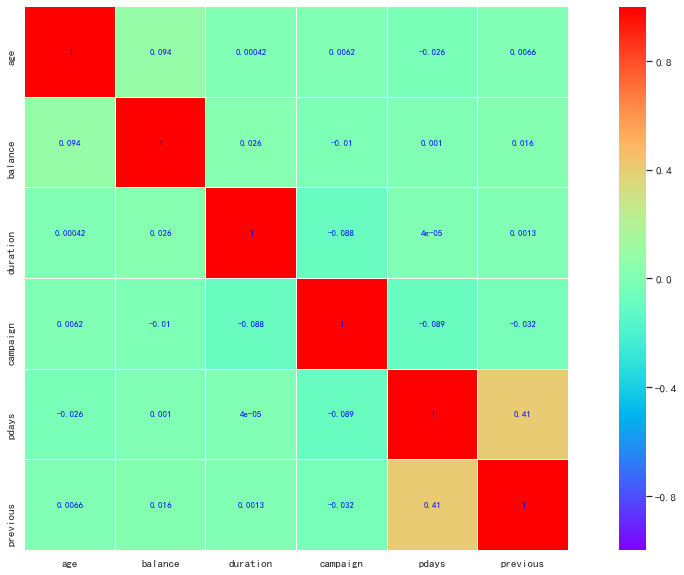

由热力图分布特征可以看出，previous对pdays以及pdays对previous有比较强的正相关关系，而pdays对campaign以及campaign对pdays有比较强的负相关关系


In [32]:
#为了展示数据集中定量变量的相关关系，对其采用可视化处理，对其进行热力图和散点图的绘制。
#对于热力图而言，颜色较深，说明两变量呈相对较强的正相关关系；颜色较 浅，说明两变量呈相对较强的负相关关系。
plt.subplots(figsize=(18, 10)) #设置画布大小
train2=pd.DataFrame(train,columns=["age","balance","duration","campaign","pdays","previous"]) #提取 定量变量
corr=train2.corr()
sns.heatmap(corr, annot=True, vmax=1, vmin=-1,square=True, cmap='rainbow', linewidths=0.2,annot_kws={'size':9,'weight':'bold', 'color':'blue'})
bottom,top=plt.ylim()
plt.ylim(bottom+0.5,top-0.5)
plt.show()
print("由热力图分布特征可以看出，previous对pdays以及pdays对previous有比较强的正相关关系，而pdays对campaign以及campaign对pdays有比较强的负相关关系")

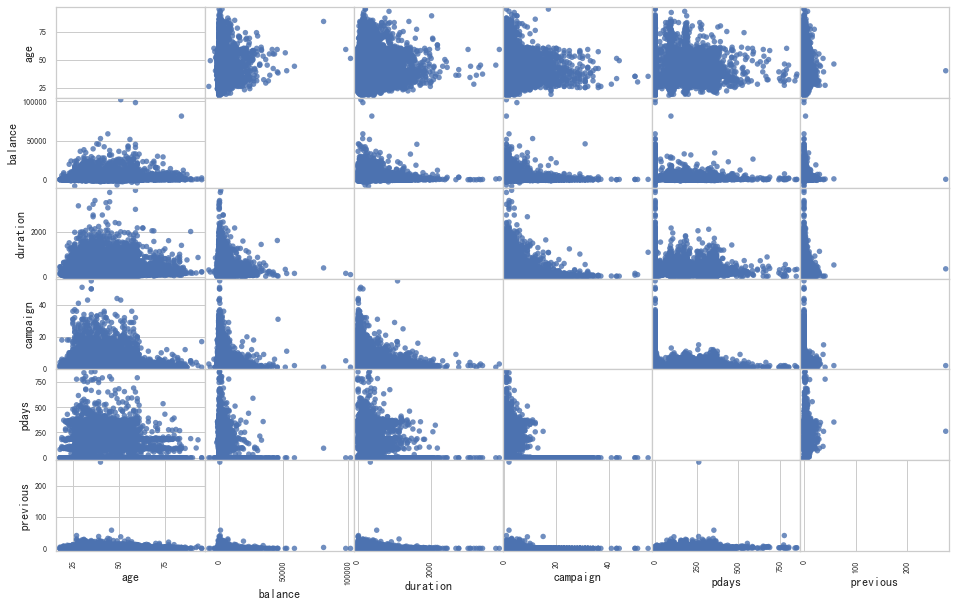

从各定量变量之间的散点图可以看出，彼此之间的影响程度都比较均匀，即使部分的散点分布图会有一些存在的偏离值，但实际情况下并不影响主要的相关关系


In [33]:
#绘制散点图
pd.plotting.scatter_matrix(train2,figsize=(16,10),marker = 'o', diagonal = ' ', s=30, alpha = 0.8) 
plt.show()
print("从各定量变量之间的散点图可以看出，彼此之间的影响程度都比较均匀，即使部分的散点分布图会有一些存在的偏离值，但实际情况下并不影响主要的相关关系")

# 对自变量按其重要性进行大体排序:

定量变量：previous >  pdays >  balance > campaign> duration > age

定性变量：day > job > month > education > marital > contact > poutcome

# 五、数据分割（只进行一轮）

In [88]:
#外推数据
x0=train[train['y']==0].sample(n=10)
x1=train[train['y']==1].sample(n=10)
dataset1=pd.concat([x0,x1])
dataset=dataset1.drop('y',axis=1)
dataset1.to_csv('dataset1.csv',encoding='utf-8')

# 按训练集:测试集=4:1 的比例进行分割
y0=train[train['y']==0].sample(n=1200)
y1=train[train['y']==1].sample(n=1200)
train5=pd.concat([y0,y1])
test5=train.loc[list(train.index .difference( train5.index))]
test5=test5.sample(n=600)
test5.to_csv('test2.csv',encoding='utf-8')
train5.to_csv('train2.csv',encoding='utf-8')

# 六、数据建模分析

根据上述分割好的训练集和测试集，进行如下建模和分析：

# 1．目标变量是分类变量

In [35]:
train5

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12944,12945,31,blue-collar,divorced,secondary,no,-452,yes,no,unknown,26,may,182,5,-1,0,unknown,0
822,823,39,housemaid,divorced,secondary,no,70,no,no,cellular,4,jun,346,2,128,8,success,0
13049,13050,56,blue-collar,married,primary,no,186,yes,no,unknown,2,jun,108,4,-1,0,unknown,0
8892,8893,39,management,single,tertiary,no,406,yes,no,unknown,7,may,68,1,-1,0,unknown,0
9016,9017,60,blue-collar,married,secondary,no,414,no,no,cellular,4,feb,147,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23381,23382,49,technician,divorced,tertiary,no,596,yes,no,telephone,15,sep,722,1,-1,0,unknown,1
23753,23754,36,management,married,tertiary,no,203,no,no,cellular,29,oct,139,1,-1,0,unknown,1
25156,25157,29,blue-collar,single,secondary,no,322,no,no,unknown,14,jun,434,1,96,6,other,1
23234,23235,61,retired,married,secondary,no,938,no,no,cellular,15,jul,392,2,183,3,success,1


由新的训练集可以看出，其中job,marital,education,default,housing,loan,contact,month,poutcome为定性变量，其中的字符无法转换成浮点型，因此需要进行热编码处理

In [36]:
one_hot_train5 = pd.get_dummies(train5)
one_hot_test5 = pd.get_dummies(test5)
one_hot_train5

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_0,y_1
12944,12945,31,-452,26,182,5,-1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
822,823,39,70,4,346,2,128,8,0,0,...,0,0,0,0,0,0,1,0,1,0
13049,13050,56,186,2,108,4,-1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
8892,8893,39,406,7,68,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,1,0
9016,9017,60,414,4,147,1,-1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23381,23382,49,596,15,722,1,-1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
23753,23754,36,203,29,139,1,-1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
25156,25157,29,322,14,434,1,96,6,0,1,...,0,0,0,0,0,1,0,0,0,1
23234,23235,61,938,15,392,2,183,3,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
one_hot_test5

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_0,y_1
16363,16364,42,230,5,175,7,-1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
7267,7268,29,0,15,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
541,542,49,734,7,42,2,324,3,0,0,...,1,0,0,0,1,0,0,0,1,0
4928,4929,35,667,20,178,1,-1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
11058,11059,45,5287,6,252,2,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20522,20523,33,233,29,155,2,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
17159,17160,38,238,30,376,8,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10307,10308,37,215,6,308,3,-1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
2719,2720,52,1282,19,148,5,-1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [38]:
#决策树算法
#热编码处理完之后的训练集从18个维度变为了54个，其中9-51列为定性变量
x_train5=one_hot_train5[one_hot_train5.columns[9:51]]
y_train5=train5['y']
model1=tree.DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=3)   #CRAT gini算法
model1.fit(x_train5, y_train5)
with open ("tree_gini.dot", 'w')as f:
    f= tree.export_graphviz(model1, out_file=f)
model2=tree.DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)#采用 C5.0 熵标准算法
model2.fit(x_train5, y_train5)
with open ("tree_entropy.dot", 'w')as f:
    f= tree.export_graphviz(model2, out_file=f)

In [39]:
#逻辑回归
model= LogisticRegression(C=100,solver="liblinear")
model.fit(x_train5,y_train5)
coefs= (pd.DataFrame(np.round(model.coef_,6))).T
print(coefs)

           0
0  -0.368580
1  -0.383591
2  -0.464657
3  -0.340002
4   0.294834
5  -0.430596
6  -0.176330
7  -0.020337
8  -0.061667
9  -0.002413
10 -0.241128
11 -0.045373
12 -0.158614
13  0.237426
14 -0.151285
15 -0.231736
16  0.260146
17  0.156313
18  0.079073
19 -0.045634
20  0.268992
21 -0.235553
22  0.084584
23 -0.051145
24  0.495081
25  0.558891
26 -1.020533
27  0.063252
28 -0.861644
29  2.030305
30 -0.343104
31 -1.363846
32 -0.694522
33  0.093421
34  1.276072
35 -0.341692
36 -0.981558
37  0.517274
38  0.639480
39 -0.022317
40  1.021387
41  2.203034


In [40]:
#SVM向量机
svm_clf=SVC(probability=True)
svm_clf.fit(x_train5, y_train5)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

（1）针对每个分类工具，运用训练数据建立模型，在测试集上计算分类正确率和AUC。要进行参数的不断调整，使得在测试集上的各类正确率和AUC尽量让你满意。（注意：不同类之间正确率要尽量平衡，如果数据本身不平衡，需要运用数据平衡技术或其他手段，尽量保证各类正确率差距不太大。）（12分）

In [41]:
#自定义混淆矩阵正确率函数
def confusion_matrix_Accuracy(x,y,model):
    predict_train=model.predict(x)
    print(metrics.confusion_matrix(y, predict_train)) # 输出混淆矩阵信息
    print(metrics.classification_report(y,predict_train)) #输出分类报告信息,行输出实际观察，列输出预测结果

# 测试集
x_test2=one_hot_test5[one_hot_test5.columns[9:51]]
y_test2=test5['y']
print('CART gini 算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(x_test2,y_test2,model1)
print('CART gini 算法 训练集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(x_train5,y_train5,model1)
print("-------------------------------------------------------")
print('C5.0 熵标准算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy (x_test2,y_test2,model2)
print('C5.0 熵标准算法 训练集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy (x_train5,y_train5,model2)

CART gini 算法 测试集 混淆矩阵及其正确率：
[[365 195]
 [ 13  27]]
              precision    recall  f1-score   support

           0       0.97      0.65      0.78       560
           1       0.12      0.68      0.21        40

    accuracy                           0.65       600
   macro avg       0.54      0.66      0.49       600
weighted avg       0.91      0.65      0.74       600

CART gini 算法 训练集 混淆矩阵及其正确率：
[[790 410]
 [382 818]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.67      1200
           1       0.67      0.68      0.67      1200

    accuracy                           0.67      2400
   macro avg       0.67      0.67      0.67      2400
weighted avg       0.67      0.67      0.67      2400

-------------------------------------------------------
C5.0 熵标准算法 测试集 混淆矩阵及其正确率：
[[367 193]
 [ 13  27]]
              precision    recall  f1-score   support

           0       0.97      0.66      0.78       560
           1       0.12      0

In [42]:
print('逻辑回归算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(x_test2,y_test2,model)
print("-------------------------------------------------------")
print('逻辑回归算法 训练集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(x_train5,y_train5,model)

逻辑回归算法 测试集 混淆矩阵及其正确率：
[[414 146]
 [ 15  25]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       560
           1       0.15      0.62      0.24        40

    accuracy                           0.73       600
   macro avg       0.56      0.68      0.54       600
weighted avg       0.91      0.73      0.80       600

-------------------------------------------------------
逻辑回归算法 训练集 混淆矩阵及其正确率：
[[931 269]
 [400 800]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1200
           1       0.75      0.67      0.71      1200

    accuracy                           0.72      2400
   macro avg       0.72      0.72      0.72      2400
weighted avg       0.72      0.72      0.72      2400



In [43]:
print('SVM 算法 测试集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(x_test2,y_test2,svm_clf)
print("-------------------------------------------------------")
print('SVM 算法 训练集 混淆矩阵及其正确率：')
confusion_matrix_Accuracy(x_train5,y_train5,svm_clf)

SVM 算法 测试集 混淆矩阵及其正确率：
[[428 132]
 [ 17  23]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       560
           1       0.15      0.57      0.24        40

    accuracy                           0.75       600
   macro avg       0.56      0.67      0.54       600
weighted avg       0.91      0.75      0.81       600

-------------------------------------------------------
SVM 算法 训练集 混淆矩阵及其正确率：
[[947 253]
 [411 789]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1200
           1       0.76      0.66      0.70      1200

    accuracy                           0.72      2400
   macro avg       0.73      0.72      0.72      2400
weighted avg       0.73      0.72      0.72      2400



In [44]:
%matplotlib inline
def Roc(x,y,model):
    y_score=model.predict_proba(x) 
    fpr,tpr,threshold=roc_curve(y,y_score[:, 1])
    roc_auc=auc(fpr,tpr)
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
    lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ROC for entropy tree ')
    plt.legend(loc="lower right")
    plt.show()
    print("AUC的值大小为：",roc_auc)


CART gini 算法 测试集 ROC 曲线和 AUC 值：


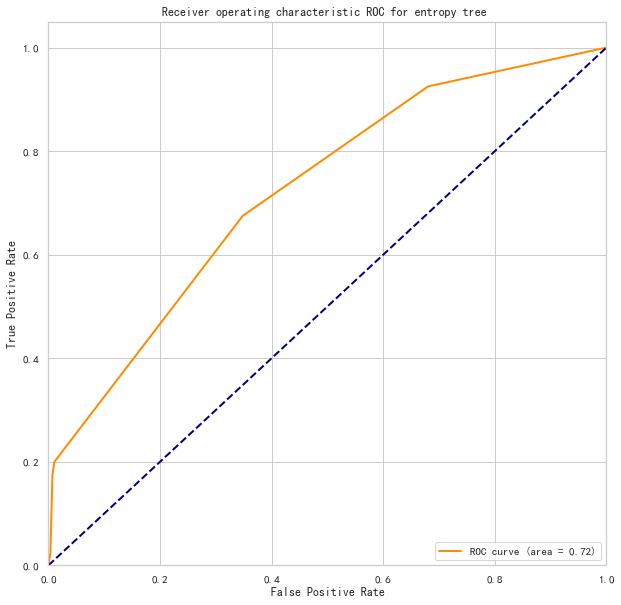

AUC的值大小为： 0.7220982142857143


In [45]:
print('\nCART gini 算法 测试集 ROC 曲线和 AUC 值：')
Roc(x_test2,y_test2,model1)


C5.0 熵标准算法 测试集 ROC 曲线和 AUC 值：


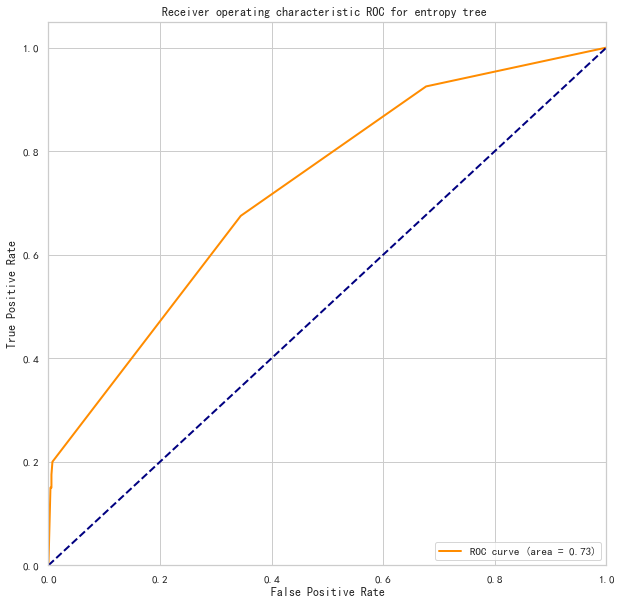

AUC的值大小为： 0.7253348214285714


In [46]:
print('\nC5.0 熵标准算法 测试集 ROC 曲线和 AUC 值：')
Roc(x_test2,y_test2,model2)


逻辑回归算法 测试集 ROC 曲线和 AUC 值：


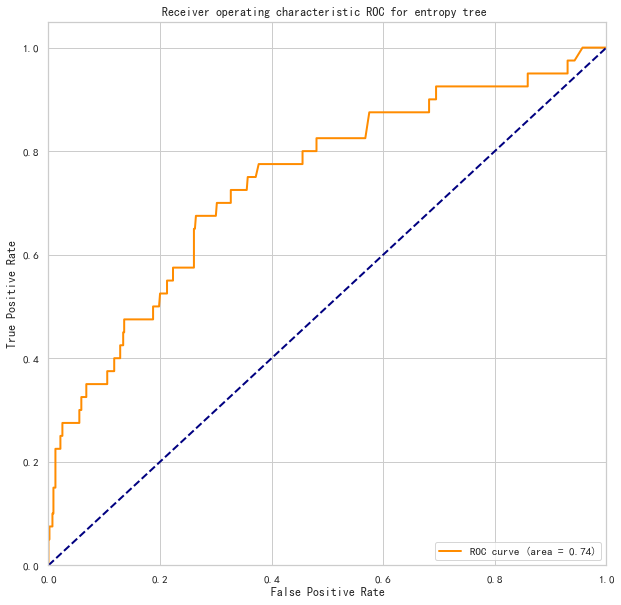

AUC的值大小为： 0.7416294642857144


In [47]:
print('\n逻辑回归算法 测试集 ROC 曲线和 AUC 值：')
Roc(x_test2,y_test2,model)

SVM 算法 测试集 ROC 曲线和 AUC 值：


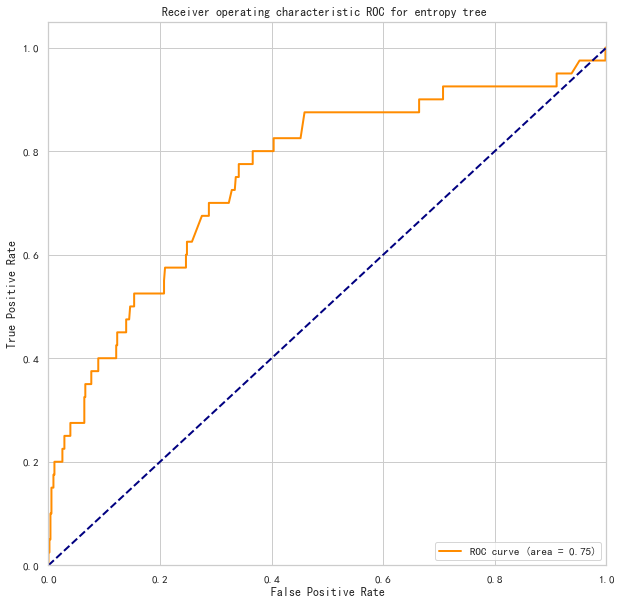

AUC的值大小为： 0.7546875


In [48]:
print('SVM 算法 测试集 ROC 曲线和 AUC 值：')
Roc(x_test2,y_test2,svm_clf)

In [49]:
def auc_counting(x,y,model):
    y_score=model.predict_proba(x) #descision_function()不可用
    fpr,tpr,threshold=roc_curve(y,y_score[:, 1])
    roc_auc=auc(fpr,tpr)
    return round(roc_auc,3)
Logistic_auc=auc_counting(x_test2,y_test2,model1)
GINI_auc=auc_counting(x_test2,y_test2,model2)
C5_auc=auc_counting(x_test2,y_test2,model)
SVM_auc=auc_counting(x_test2,y_test2,svm_clf)

dict_data = {
 '模型':["CART","C5.0","Logistic回归","SVM"],
 '1类正确率' :[0.66,0.66,0.78,0.76],
 '2类正确率':[0.77,0.77,0.75,0.82],
 '总正确率':[0.67,0.67,0.78,0.76],
 'AUC':[GINI_auc,C5_auc,Logistic_auc,SVM_auc]}
pd.DataFrame(dict_data)

,模型,1类正确率,2类正确率,总正确率,AUC
0,CART,0.66,0.77,0.67,0.725
1,C5.0,0.66,0.77,0.67,0.742
2,Logistic回归,0.78,0.75,0.78,0.722
3,SVM,0.76,0.82,0.76,0.755


（3）对不同分类工具自变量选择的比较：各种分类工具选择的自变量各是什么，有哪些自变量是所有分类工具所共有的，有哪些自变量是某个方法所特有的（结果可用一张表的形式来展示，见下表）,并分析现在所有模型中选出的变量，与第四部分对变量重要性分析和结果是否一致，差距多大（5分）

CART gini 算法 决策树分类规则及可视化
CART gini算法主要自变量X[41 20 26 15 0 36 6]


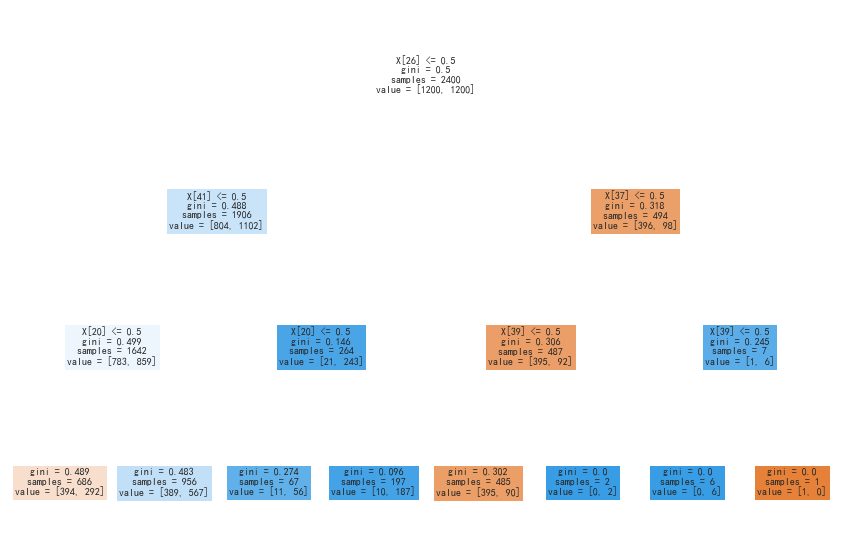

In [50]:
print('CART gini 算法 决策树分类规则及可视化')
plt.figure(figsize=(15,10))
plot_tree(model1,filled=True)
print("CART gini算法主要自变量X[41 20 26 15 0 36 6]")

C5.0 熵标准算法 决策树分类规则及可视化


[Text(418.5, 475.65000000000003, 'X[41] <= 0.5\nentropy = 1.0\nsamples = 2400\nvalue = [1200, 1200]'),
 Text(209.25, 339.75, 'X[26] <= 0.5\nentropy = 0.992\nsamples = 2134\nvalue = [1178, 956]'),
 Text(104.625, 203.85000000000002, 'X[20] <= 0.5\nentropy = 0.998\nsamples = 1642\nvalue = [783, 859]'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.984\nsamples = 686\nvalue = [394, 292]'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.975\nsamples = 956\nvalue = [389, 567]'),
 Text(313.875, 203.85000000000002, 'X[37] <= 0.5\nentropy = 0.716\nsamples = 492\nvalue = [395, 97]'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.696\nsamples = 485\nvalue = [394, 91]'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(627.75, 339.75, 'X[20] <= 0.5\nentropy = 0.412\nsamples = 266\nvalue = [22, 244]'),
 Text(523.125, 203.85000000000002, 'X[12] <= 0.5\nentropy = 0.639\nsamples = 68\nvalue = [11, 57]'),
 Text(470.8125, 67.94999999999999, 'entropy = 0.345\n

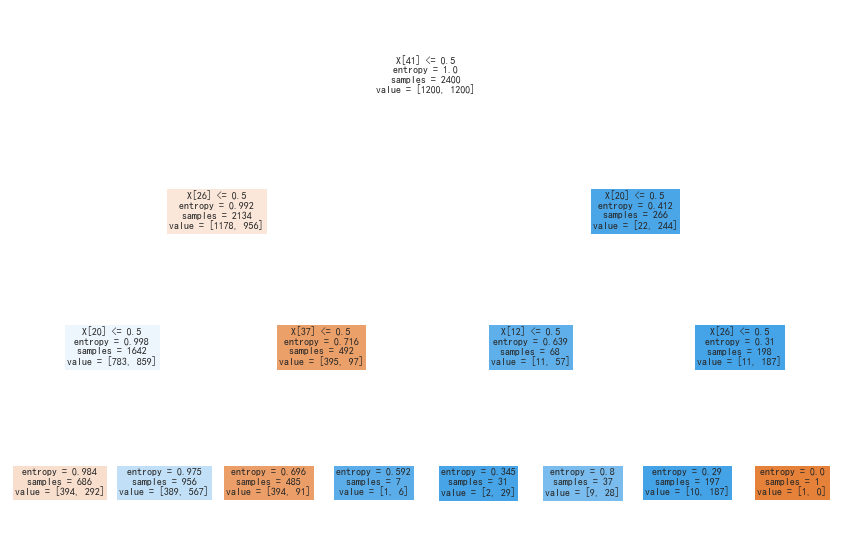

In [51]:
print('C5.0 熵标准算法 决策树分类规则及可视化')
plt.figure(figsize=(15,10))
plot_tree(model2,filled=True)
#print("C5.0 熵标准算法主要自变量X[41 26 0 15 20 36 38]")

In [52]:
print('逻辑回归主要自变量为 X',abs(coefs).sort_values(by=0,ascending=False).head(5).index.values)

逻辑回归主要自变量为 X [41 29 31 34 40]


In [53]:
print(one_hot_train5.columns[41],'为各种模型均有的主要自变量\n',list(one_hot_train5.columns[[41,26,20,15,0,36]]),'为决策树模型均有的主要自变量')
print(list(one_hot_train5.columns[[6]]),'为 CART 特有的主要自变量\n',list(one_hot_train5.columns[[34,10,28,37]]),'为回归份子特有的主要自变量')

month_jul 为各种模型均有的主要自变量
 ['month_jul', 'education_unknown', 'marital_divorced', 'job_services', 'ID', 'month_apr'] 为决策树模型均有的主要自变量
['pdays'] 为 CART 特有的主要自变量
 ['contact_telephone', 'job_entrepreneur', 'default_yes', 'month_aug'] 为回归份子特有的主要自变量


（4）根据各分类模型中出现的自变量，结合模型和前面的描述分析，分析自变量对因变量的影响机制

见论文详说

# 4.组合预测效果评价

对于回归问题，将两个模型的结果进行组合预测（10分）；

In [90]:
# Soft Voting
voting_clf = VotingClassifier(estimators=[ ('log_clf', LogisticRegression()),
('svm_clf', SVC(probability=True)),
('dt_clf', DecisionTreeClassifier(random_state=666))
], voting='soft')
voting_clf.fit(x_train5, y_train5)
print('简单投票组合预测算法 测试集 混淆矩阵及其正确率：')
auc_counting (x_test2,y_test2,voting_clf)
confusion_matrix_Accuracy(x_test2,y_test2,voting_clf)
voting_clf.score(x_test2, y_test2)

简单投票组合预测算法 测试集 混淆矩阵及其正确率：
[[395 165]
 [ 12  28]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       560
           1       0.15      0.70      0.24        40

    accuracy                           0.70       600
   macro avg       0.56      0.70      0.53       600
weighted avg       0.92      0.70      0.78       600



0.705

外推预测使用SPSS软件进行